In [1]:
import os
import sys
import csv
import logging
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..',))
sys.path.append(repo_root)

from src import *

In [2]:
process_directory(1, os.getcwd(), 'ex02.2' , '02.1')
process_directory(3, os.getcwd(), 'ex02.2' , '02.2')
process_directory(4, os.getcwd(), 'ex02.3' , '02.3')

In [3]:


def plot_distributions(prop_df, mean_df):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot distributions of all columns using kdeplot
    for column in prop_df.columns:  
        if 'Unnamed' not in column and column != 'rep':
            sns.kdeplot(prop_df[column], ax=axes[0], label=column)
    axes[0].set_title('Proportions Distribution')
    axes[0].set_xlabel('Proportion')
    axes[0].set_ylabel('Density')
    axes[0].legend()

    # Plot distributions of all columns using kdeplot for means
    for column in mean_df.columns:
        if 'Unnamed' not in column and column != 'rep':
            sns.kdeplot(mean_df[column], ax=axes[1], label=column)
    axes[1].set_title('Means Distribution')
    axes[1].set_xlabel('Mean')
    axes[1].set_ylabel('Density')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

# Standard 

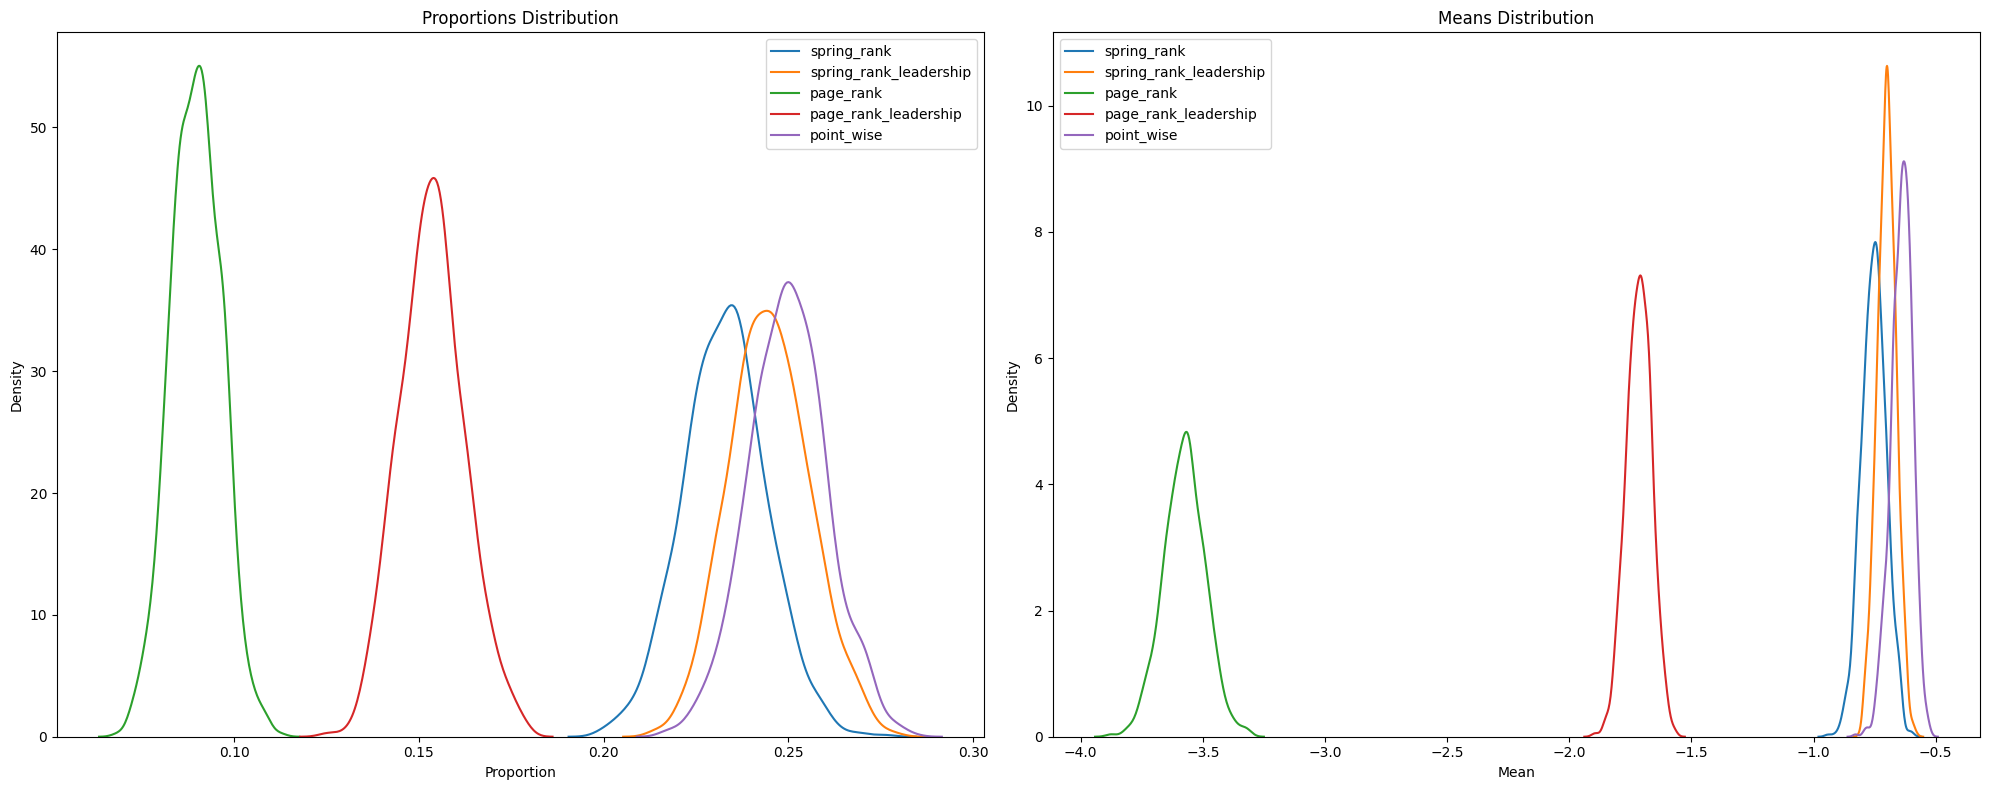

In [4]:
prop_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '02.1_proportions.csv')).drop(columns=['newman_leadership', 'higher_order_newman', 'higher_order_leadership'])
mean_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '02.1_means.csv')).drop(columns=['newman_leadership', 'higher_order_newman', 'higher_order_leadership'])

plot_distributions(prop_df, mean_df)

# Higher Order 

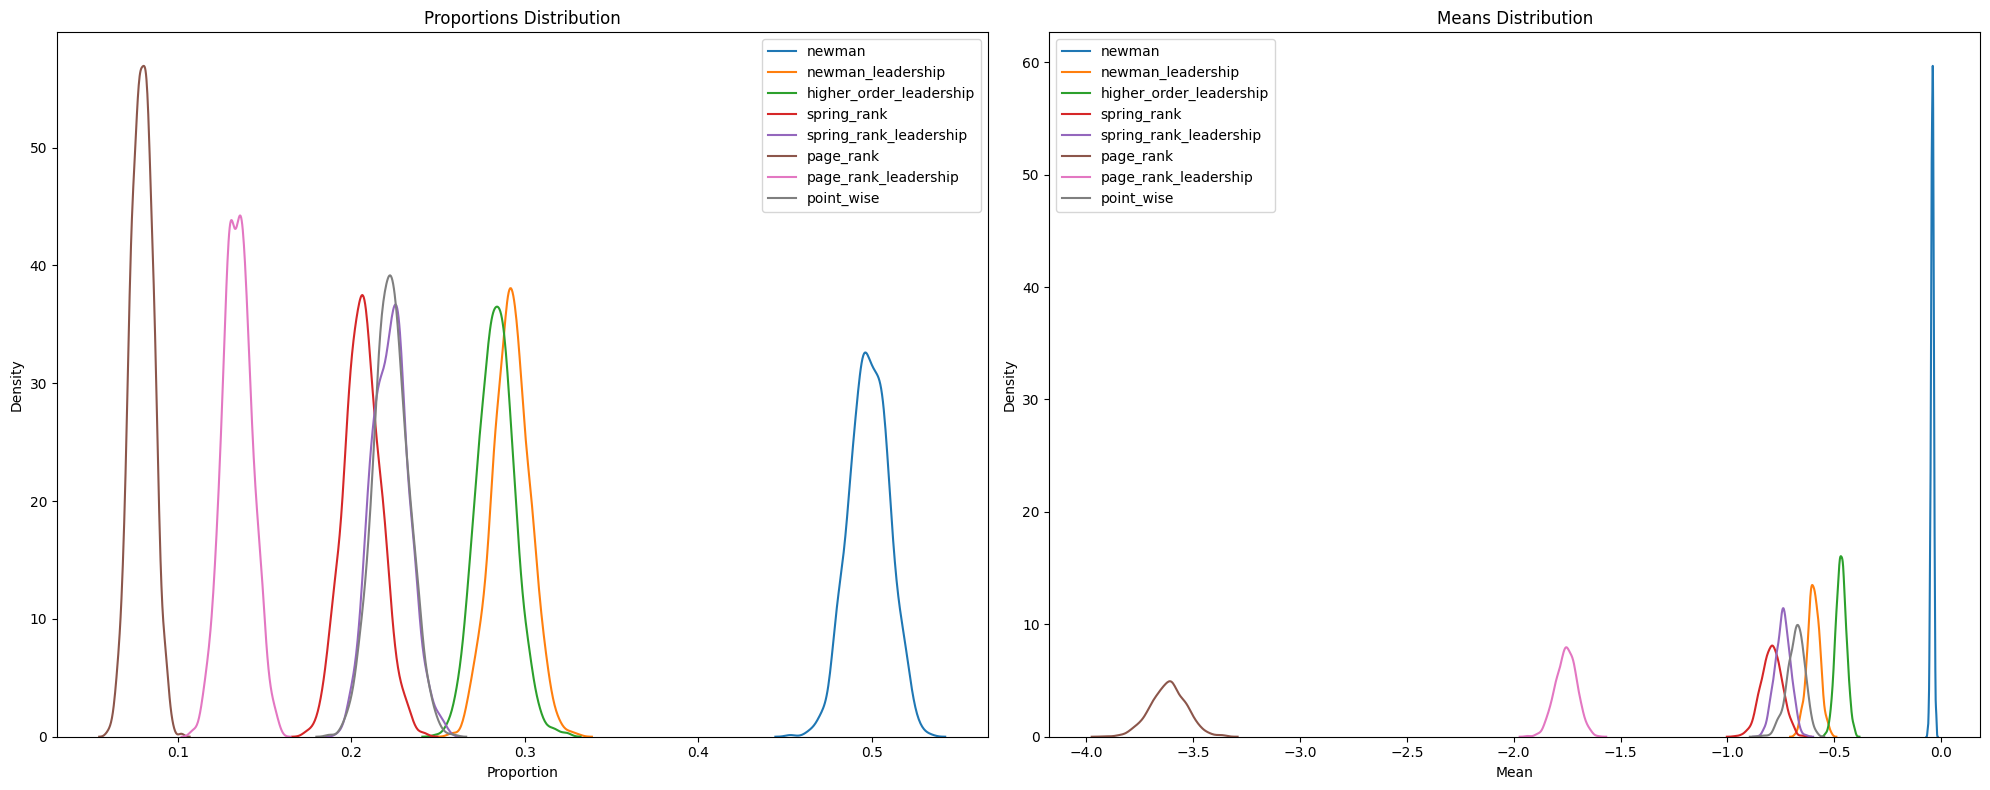

In [5]:
prop_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '02.2_proportions.csv'))
mean_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '02.2_means.csv'))
plot_distributions(prop_df, mean_df)

# Higher Order Leadership

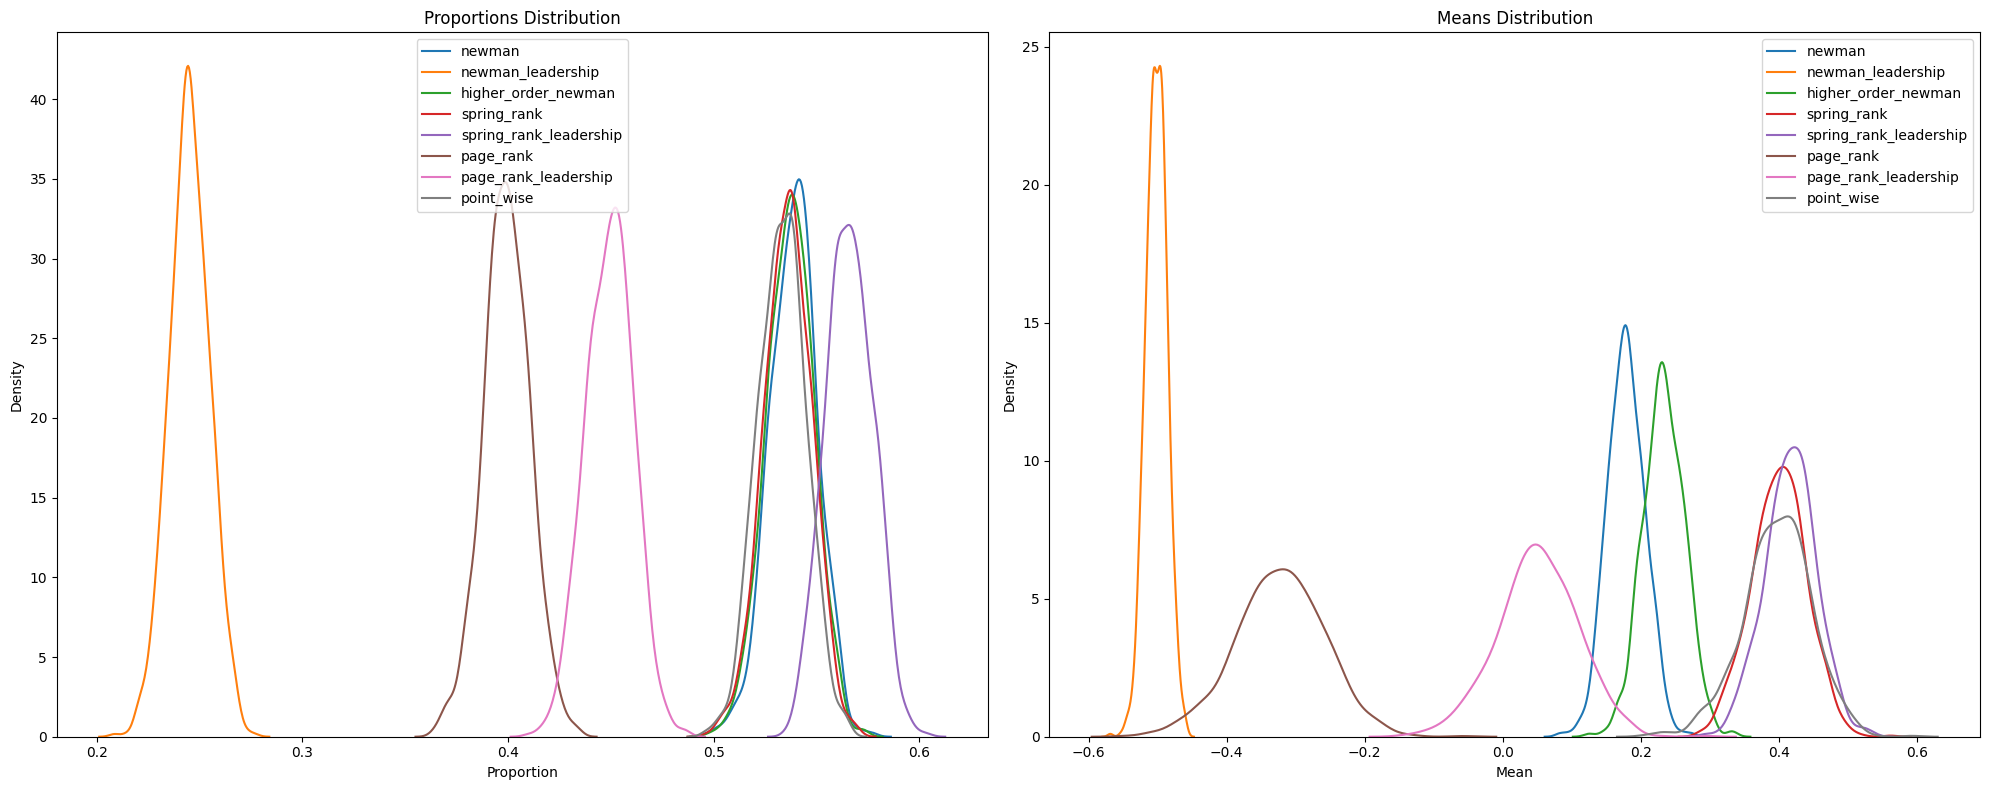

In [6]:
prop_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '02.3_proportions.csv'))
mean_df = pd.read_csv(os.path.join(os.getcwd(), 'results', '02.3_means.csv'))
plot_distributions(prop_df, mean_df)